In [2]:
! pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


In [4]:
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 3.9 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 7.0 MB/s eta 0:00:000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 6.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.7 MB/s eta 0:00:0

In [22]:
! pip install tf-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 MB 6.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.0 MB/s eta 0:00:00a 0:00:01


In [35]:
import pickle
import numpy as np
import os

In [37]:
def unpickle(file):
    """ Load a pickled object from a file """
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar10_data(data_dir):
    """ Load all batches of CIFAR-10 """
    train_data = []
    train_labels = []

    # Load all training batches
    for i in range(1, 6):
        batch_name = os.path.join(data_dir, f'data_batch_{i}')
        batch_data = unpickle(batch_name)
        if len(train_data) > 0:
            train_data = np.vstack((train_data, batch_data[b'data']))
            train_labels = np.hstack((train_labels, batch_data[b'labels']))
        else:
            train_data = batch_data[b'data']
            train_labels = batch_data[b'labels']

    # Load test batch
    test_batch_name = os.path.join(data_dir, 'test_batch')
    test_batch = unpickle(test_batch_name)
    test_data = test_batch[b'data']
    test_labels = np.array(test_batch[b'labels'])

    # Reshape data
    train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

    return train_data, np.array(train_labels), test_data, test_labels


In [39]:
data_dir = '/Users/ireneliu/Desktop/cifar-10-batches-py'
train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [47]:
train_generator = train_datagen.flow(
    X_train, y_train_cat, 
    batch_size=32
)

validation_generator = ImageDataGenerator(rescale=1./255).flow(
    X_val, y_val_cat, 
    batch_size=32
)

In [49]:
print("Image shape:", X_train.shape[1:])  
print("Number of classes:", y_train_cat.shape[1]) 

Image shape: (32, 32, 3)
Number of classes: 10


2. Initial Classifier Build: 

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [53]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

3. Model Runs: 

In [59]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=625,  
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(X_val) // 32  
)

Epoch 1/30
 16/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0766 - loss: 2.3290  

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2052 - loss: 2.1051 - val_accuracy: 0.4237 - val_loss: 1.5930
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3817 - loss: 1.6798 - val_accuracy: 0.6875 - val_loss: 1.3764
Epoch 3/30


2024-05-02 09:00:04.843101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-02 09:00:04.853708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4851 - val_loss: 1.4130
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4390 - loss: 1.5554 - val_accuracy: 0.6875 - val_loss: 0.9034
Epoch 5/30
 25/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4419 - loss: 1.4844

2024-05-02 09:00:10.300488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4668 - loss: 1.4782 - val_accuracy: 0.5061 - val_loss: 1.3915
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 10us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4375 - val_loss: 1.5327
Epoch 7/30
 16/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5140 - loss: 1.4213

2024-05-02 09:00:16.000259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:00:16.003660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4939 - loss: 1.4237 - val_accuracy: 0.5452 - val_loss: 1.2412
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5152 - loss: 1.3758 - val_accuracy: 0.6250 - val_loss: 0.9992
Epoch 9/30


2024-05-02 09:00:26.071809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:00:26.075735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5841 - val_loss: 1.1833
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5339 - loss: 1.3252 - val_accuracy: 0.4375 - val_loss: 1.3765
Epoch 11/30
 21/625 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5769 - loss: 1.2995

2024-05-02 09:00:31.373027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5490 - loss: 1.2934 - val_accuracy: 0.6048 - val_loss: 1.0963
Epoch 12/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 1.1653
Epoch 13/30
 16/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5160 - loss: 1.3120

2024-05-02 09:00:36.592807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:00:36.596406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5509 - loss: 1.2600 - val_accuracy: 0.5895 - val_loss: 1.1325
Epoch 14/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5717 - loss: 1.2436 - val_accuracy: 0.8125 - val_loss: 1.0365
Epoch 15/30


2024-05-02 09:00:46.018833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:00:46.022798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6190 - val_loss: 1.0610
Epoch 16/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5695 - loss: 1.2258 - val_accuracy: 0.6250 - val_loss: 1.2160
Epoch 17/30
 22/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6290 - loss: 1.1249

2024-05-02 09:00:52.365860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5960 - loss: 1.1826 - val_accuracy: 0.6287 - val_loss: 1.0260
Epoch 18/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6623
Epoch 19/30
 15/625 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6412 - loss: 1.1353

2024-05-02 09:00:57.686486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:00:57.691040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5990 - loss: 1.1564 - val_accuracy: 0.6543 - val_loss: 0.9693
Epoch 20/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6039 - loss: 1.1322 - val_accuracy: 0.6250 - val_loss: 1.0604
Epoch 21/30


2024-05-02 09:01:07.866150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:01:07.870310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6359 - val_loss: 1.0138
Epoch 22/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6082 - loss: 1.1189 - val_accuracy: 0.6875 - val_loss: 0.8889
Epoch 23/30
 19/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5368 - loss: 1.2593

2024-05-02 09:01:13.341399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6079 - loss: 1.1297 - val_accuracy: 0.6584 - val_loss: 0.9693
Epoch 24/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.9615
Epoch 25/30
 14/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6205 - loss: 1.1267

2024-05-02 09:01:19.683278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:01:19.687226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6119 - loss: 1.1119 - val_accuracy: 0.6487 - val_loss: 1.0042
Epoch 26/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6274 - loss: 1.0701 - val_accuracy: 0.6875 - val_loss: 1.0703
Epoch 27/30


2024-05-02 09:01:30.475381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:01:30.479675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6641 - val_loss: 0.9526
Epoch 28/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6241 - loss: 1.0795 - val_accuracy: 0.5625 - val_loss: 1.3777
Epoch 29/30
 22/625 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6057 - loss: 1.0980

2024-05-02 09:01:35.774703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6422 - loss: 1.0491 - val_accuracy: 0.6758 - val_loss: 0.9301
Epoch 30/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2127


2024-05-02 09:01:41.342635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:01:41.346235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [73]:
import os

current_dir = os.getcwd()
output_dir = os.path.join(current_dir, 'output')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, 'Training_Validation_Loss_Accuracy.png')

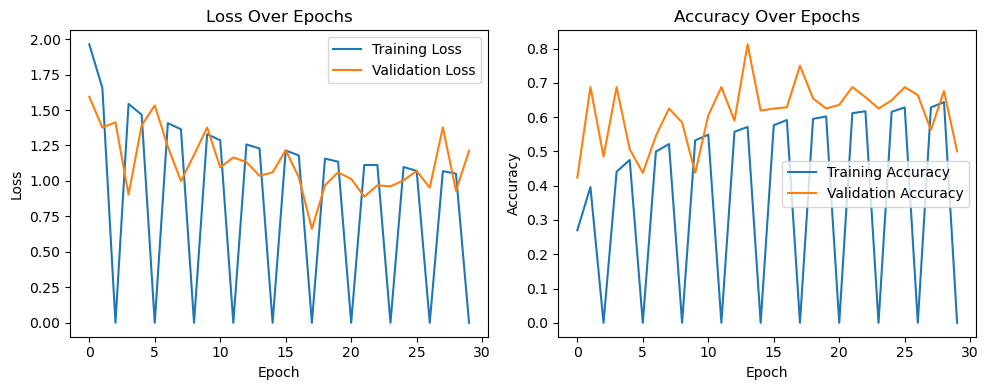

Plot saved to /Users/ireneliu/output/Training_Validation_Loss_Accuracy.png


In [75]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig(file_path) 
plt.show()

print(f"Plot saved to {file_path}")

In [77]:
model_save_path = os.path.join(output_dir, 'cifar10_model.h5')

In [79]:
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /Users/ireneliu/output/cifar10_model.h5


In [83]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load the saved model
model_loaded = load_model(model_save_path)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(
    test_data,
    to_categorical(test_labels, num_classes=10),
    batch_size=32,
    shuffle=False
)

test_loss, test_accuracy = model_loaded.evaluate(test_generator, steps=len(test_data) // 32)
print(f'Test Accuracy: {test_accuracy}')

312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6743 - loss: 0.9437
Test Accuracy: 0.6763821840286255


In [87]:
model_loaded = load_model(model_save_path)

model_loaded.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

configurations = [
    (100, 2), (250, 2), (500, 2),
    (100, 5), (250, 5), (500, 5),
    (100, 9), (250, 9), (500, 9),
    (5, 10)
]

results = []

for steps, epochs in configurations:
    model_loaded.fit(
        train_generator,
        steps_per_epoch=steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(X_val) // 32
    )
    accuracy = model_loaded.evaluate(test_generator, steps=len(test_data) // 32)[1]
    results.append({'Steps per Epoch': steps, 'Epochs': epochs, 'Accuracy': accuracy})
    print(f"Completed config: Steps {steps}, Epochs {epochs}, Accuracy {accuracy}")

Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6350 - loss: 1.0408 - val_accuracy: 0.6859 - val_loss: 0.8939
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6437 - loss: 1.0775 - val_accuracy: 0.7500 - val_loss: 0.9265
 62/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6972 - loss: 0.8826

2024-05-02 09:40:40.937296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6913 - loss: 0.9026
Completed config: Steps 100, Epochs 2, Accuracy 0.6900039911270142
Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6461 - loss: 1.0274 - val_accuracy: 0.6725 - val_loss: 0.9491
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6364 - loss: 1.0317 - val_accuracy: 0.7500 - val_loss: 0.8650
 49/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6952 - loss: 0.8909

2024-05-02 09:40:46.131920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6888 - loss: 0.9115
Completed config: Steps 250, Epochs 2, Accuracy 0.6869992017745972
Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6354 - loss: 1.0468 - val_accuracy: 0.6596 - val_loss: 1.0216
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6537 - loss: 1.0175 - val_accuracy: 0.5625 - val_loss: 1.3029
 65/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - loss: 0.9109

2024-05-02 09:40:55.532035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6772 - loss: 0.9309
Completed config: Steps 500, Epochs 2, Accuracy 0.6761819124221802
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6425 - loss: 1.0281 - val_accuracy: 0.6718 - val_loss: 0.9455
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6520 - loss: 1.0015 - val_accuracy: 0.6875 - val_loss: 0.8732
Epoch 3/5
 24/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6637 - loss: 0.9815

2024-05-02 09:40:58.644716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6554 - loss: 0.9976 - val_accuracy: 0.6862 - val_loss: 0.8911
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6733 - loss: 0.9878 - val_accuracy: 0.6875 - val_loss: 0.7271
Epoch 5/5
 22/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6486 - loss: 1.0126

2024-05-02 09:41:00.725074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6455 - loss: 1.0314 - val_accuracy: 0.6741 - val_loss: 0.9318
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6680 - loss: 0.9355
Completed config: Steps 100, Epochs 5, Accuracy 0.6689703464508057
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6490 - loss: 1.0169 - val_accuracy: 0.6961 - val_loss: 0.8756
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6546 - loss: 0.9933 - val_accuracy: 0.6875 - val_loss: 1.4859
Epoch 3/5
 23/250 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6181 - loss: 1.1021

2024-05-02 09:41:07.061186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6481 - loss: 1.0232 - val_accuracy: 0.6791 - val_loss: 0.9218
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6705 - loss: 0.9915 - val_accuracy: 0.6250 - val_loss: 0.7398
Epoch 5/5
 24/250 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6664 - loss: 0.9817

2024-05-02 09:41:11.179475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6681 - loss: 0.9798 - val_accuracy: 0.6868 - val_loss: 0.9222
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6873 - loss: 0.9225
Completed config: Steps 250, Epochs 5, Accuracy 0.6860977411270142
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6638 - loss: 0.9723 - val_accuracy: 0.6956 - val_loss: 0.8815
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6642 - loss: 0.9590 - val_accuracy: 0.6875 - val_loss: 1.0956
Epoch 3/5
 21/500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6702 - loss: 0.9429

2024-05-02 09:41:22.900844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


244/500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6671 - loss: 0.9727

2024-05-02 09:41:24.668054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6656 - loss: 0.9785 - val_accuracy: 0.6943 - val_loss: 0.8631
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6557 - loss: 0.9858 - val_accuracy: 0.8125 - val_loss: 0.5160
Epoch 5/5
 21/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6702 - loss: 0.9381

2024-05-02 09:41:28.950735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6716 - loss: 0.9616 - val_accuracy: 0.7009 - val_loss: 0.8623
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7075 - loss: 0.8542
Completed config: Steps 500, Epochs 5, Accuracy 0.7016226053237915
Epoch 1/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6857 - loss: 0.9489 - val_accuracy: 0.7053 - val_loss: 0.8417
Epoch 2/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6596 - loss: 0.9457 - val_accuracy: 0.6250 - val_loss: 0.7188
Epoch 3/9
 24/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6380 - loss: 1.0917

2024-05-02 09:41:35.873865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6523 - loss: 1.0259 - val_accuracy: 0.7088 - val_loss: 0.8492
Epoch 4/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6817 - loss: 0.9442 - val_accuracy: 0.6250 - val_loss: 1.3895
Epoch 5/9
 25/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6869 - loss: 0.9055

2024-05-02 09:41:37.882227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6784 - loss: 0.9310 - val_accuracy: 0.6985 - val_loss: 0.8779
Epoch 6/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6834 - loss: 0.9103 - val_accuracy: 0.6250 - val_loss: 1.0274
Epoch 7/9
 24/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7122 - loss: 0.8968

2024-05-02 09:41:39.863920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6842 - loss: 0.9312 - val_accuracy: 0.6918 - val_loss: 0.8749
Epoch 8/9
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6772 - loss: 0.9520 - val_accuracy: 0.6875 - val_loss: 0.8772
Epoch 9/9
 25/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6701 - loss: 0.9759

2024-05-02 09:41:41.889594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6641 - loss: 0.9815 - val_accuracy: 0.7068 - val_loss: 0.8465
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7064 - loss: 0.8484
Completed config: Steps 100, Epochs 9, Accuracy 0.7036257982254028
Epoch 1/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6683 - loss: 0.9639 - val_accuracy: 0.7071 - val_loss: 0.8411
Epoch 2/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6784 - loss: 0.9506 - val_accuracy: 0.8125 - val_loss: 0.7093
Epoch 3/9
 19/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6796 - loss: 0.9651

2024-05-02 09:41:48.723943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6745 - loss: 0.9514 - val_accuracy: 0.7045 - val_loss: 0.8499
Epoch 4/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6811 - loss: 0.9319 - val_accuracy: 0.6875 - val_loss: 0.9736
Epoch 5/9
 18/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6635 - loss: 0.8837

2024-05-02 09:41:53.227677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6695 - loss: 0.9515 - val_accuracy: 0.7045 - val_loss: 0.8603
Epoch 6/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 1.0869
Epoch 7/9
 14/250 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6726 - loss: 0.9005

2024-05-02 09:41:56.047697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:41:56.052880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6730 - loss: 0.9356 - val_accuracy: 0.6985 - val_loss: 0.8614
Epoch 8/9
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6745 - loss: 0.9467 - val_accuracy: 0.5000 - val_loss: 1.6032
Epoch 9/9
 22/250 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7067 - loss: 0.8518

2024-05-02 09:42:00.660622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6858 - loss: 0.9286 - val_accuracy: 0.7162 - val_loss: 0.8184
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7140 - loss: 0.8189
Completed config: Steps 250, Epochs 9, Accuracy 0.7161458134651184
Epoch 1/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6858 - loss: 0.9248 - val_accuracy: 0.6962 - val_loss: 0.8703
Epoch 2/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6873 - loss: 0.9045 - val_accuracy: 0.8750 - val_loss: 0.5421
Epoch 3/9
 21/500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6950 - loss: 0.9227

2024-05-02 09:42:12.136686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


250/500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6819 - loss: 0.9381

2024-05-02 09:42:14.039676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6834 - loss: 0.9298 - val_accuracy: 0.7003 - val_loss: 0.8542
Epoch 4/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6842 - loss: 0.9111 - val_accuracy: 0.8125 - val_loss: 0.7967
Epoch 5/9
 16/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6856 - loss: 0.8710

2024-05-02 09:42:19.210259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6787 - loss: 0.9333 - val_accuracy: 0.7034 - val_loss: 0.8606
Epoch 6/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6862 - loss: 0.9158 - val_accuracy: 0.5625 - val_loss: 0.9787
Epoch 7/9
 15/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6737 - loss: 1.0034

2024-05-02 09:42:25.632421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-02 09:42:25.637347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6824 - loss: 0.9295 - val_accuracy: 0.7238 - val_loss: 0.7925
Epoch 8/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6851 - loss: 0.8987 - val_accuracy: 0.5625 - val_loss: 1.1567
Epoch 9/9
 20/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6663 - loss: 1.0440

2024-05-02 09:42:33.904649: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


245/500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6838 - loss: 0.9422

2024-05-02 09:42:35.892803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6896 - loss: 0.9272 - val_accuracy: 0.7216 - val_loss: 0.8009
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7252 - loss: 0.8128
Completed config: Steps 500, Epochs 9, Accuracy 0.7169471383094788
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.7512 - loss: 0.6963 - val_accuracy: 0.7146 - val_loss: 0.8163
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7490 - loss: 0.7721 - val_accuracy: 0.6875 - val_loss: 1.1741
Epoch 3/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.8513

2024-05-02 09:42:38.225379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.6796 - loss: 0.8208 - val_accuracy: 0.7164 - val_loss: 0.8196
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6791 - loss: 0.9400 - val_accuracy: 0.6875 - val_loss: 0.7719
Epoch 5/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.7984

2024-05-02 09:42:39.033633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.7178 - loss: 0.8915 - val_accuracy: 0.7093 - val_loss: 0.8525
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7503 - loss: 0.7234 - val_accuracy: 0.6250 - val_loss: 1.1068
Epoch 7/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 1.3103

2024-05-02 09:42:39.774703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6752 - loss: 1.0255 - val_accuracy: 0.7057 - val_loss: 0.8595
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6600 - loss: 1.0193 - val_accuracy: 0.6250 - val_loss: 0.7707
Epoch 9/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8125 - loss: 0.8216

2024-05-02 09:42:40.598623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.7120 - loss: 0.9239 - val_accuracy: 0.7193 - val_loss: 0.8116
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6691 - loss: 0.9044 - val_accuracy: 0.7500 - val_loss: 0.8619
 66/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7194 - loss: 0.7928

2024-05-02 09:42:41.364519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7181 - loss: 0.8173
Completed config: Steps 5, Epochs 10, Accuracy 0.7179487347602844


In [89]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

results_csv_path = os.path.join(output_dir, 'training_results.csv')
results_df.to_csv(results_csv_path, index=False)
print(f"Results saved to {results_csv_path}")

   Steps per Epoch  Epochs  Accuracy
0              100       2  0.690004
1              250       2  0.686999
2              500       2  0.676182
3              100       5  0.668970
4              250       5  0.686098
5              500       5  0.701623
6              100       9  0.703626
7              250       9  0.716146
8              500       9  0.716947
9                5      10  0.717949
Results saved to /Users/ireneliu/output/training_results.csv


4. Model Run with early stopping

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
# Setting up early stopping
early_stopper = EarlyStopping(
    monitor='val_loss',   
    patience=3,            
    restore_best_weights=True 
)

In [95]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=50,  
    validation_data=validation_generator,
    callbacks=[early_stopper]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6451 - loss: 1.0302 - val_accuracy: 0.6794 - val_loss: 0.8983
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6460 - loss: 1.0157 - val_accuracy: 0.6893 - val_loss: 0.8762
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6578 - loss: 0.9976 - val_accuracy: 0.6859 - val_loss: 0.9027
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6553 - loss: 0.9979 - val_accuracy: 0.6976 - val_loss: 0.8608
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6676 - loss: 0.9687 - val_accuracy: 0.6963 - val_loss: 0.8798
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6708 - loss: 0.9504 - val_accuracy: 0.7039 - val_loss: 0.8627
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6773 - loss: 0.9438 - val_accuracy: 0.7058 - val_loss: 0.8560
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6849 - loss: 0.9

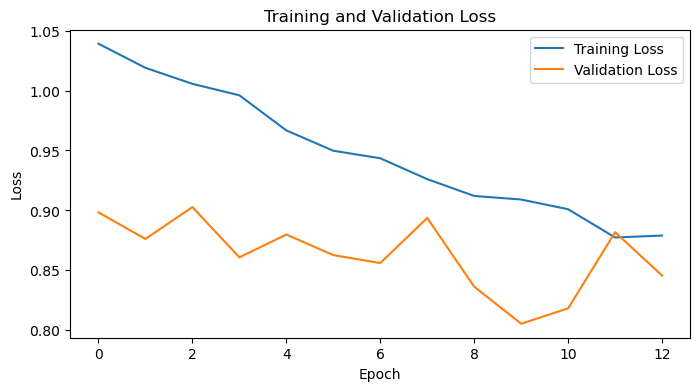

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [99]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(
    test_data,
    to_categorical(test_labels, num_classes=10),
    batch_size=32,
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

 57/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7324 - loss: 0.7819

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7208 - loss: 0.8115
Test Accuracy: 0.7178000211715698


Out of all the runs, which model has the highest test data accuracy?

The early stop yields a high test accuracy score of 0.7178, and when the number of epochs is 10 with 5 steps per epoch, the accuracy is 0.7179. which is very close, but overall the early stop model is perform better in this case. 

Conceptual Questions: 

5. Discuss the effect of the following on accuracy and loss (train & test): 

Increasing the steps_per_epoch
Low Steps per Epoch: Fewer updates per epoch can lead to underfitting, where the model doesn't learn the dataset sufficiently, often resulting in lower accuracy.
High Steps per Epoch: More updates per epoch provide more learning opportunities, generally leading to better model performance, as evidenced by higher accuracies in your results when steps per epoch are increased.

Increasing the number of epochs
Few Epochs: With fewer epochs, the model has limited exposure to the dataset, which might not be enough for the training to converge, typically resulting in lower accuracy.
More Epochs: More epochs allow the model to better learn from the dataset, improving accuracy as the model has more iterations to adjust its weights.

6. Name two uses of zero padding in CNN.

Preserves Dimensions: Adds zeros to borders, allowing filters to see the entire input and maintaining spatial dimensions (height, width) of feature maps.

Controls Output Size: Strategically used padding can ensure the output has the same size as the input or maintain receptive field size in dilated convolutions.

7. What is the use of a 1 x 1 kernel in CNN? 

Feature Engineering: Reduce channels, introduce non-linearities, or even increase channels for more complex feature representation.

Bottleneck Layers: Used in Inception networks to efficiently reduce dimensionality before larger filters.

8. What are the advantages of a CNN over a fully connected DNN for this image classification problem?

Parameter Efficiency: CNNs use weight sharing through filters, drastically reducing the number of parameters compared to a fully connected network with the same number of hidden units. This is crucial for image data, which has high dimensionality due to the large number of pixels. Fewer parameters lead to less overfitting and faster training.

Local Connectivity: Local connectivity captures relationships between nearby pixels, crucial for images. Fully connected DNNs treat all pixels equally, potentially missing this spatial information.

Automatic Feature Extraction: CNNs learn feature representations through the convolutional layers, reducing the need for manual feature engineering. No need for manual feature engineering, saving time and effort.